# **Breast Cancer Classification using Machine Learning**

In [1]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset from Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/wisconsin_breast_cancer.csv"
df = pd.read_csv(file_path)

**Basic Data Exploration**

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

In [8]:
df.shape

(569, 33)

**Data Pre-Processing**

In [9]:
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
encoder = LabelEncoder()

# Apply transformation
df["diagnosis"] = encoder.fit_transform(df["diagnosis"])

# Verify: Now 'M' = 1 and 'B' = 0
print(df["diagnosis"].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [12]:
# Drop 'id' and 'Unnamed: 32' columns
df = df.drop(columns=["id", "Unnamed: 32"])

# Verify changes
print(df.head())  # Check the first few rows

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [13]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [14]:
df.groupby("diagnosis").mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


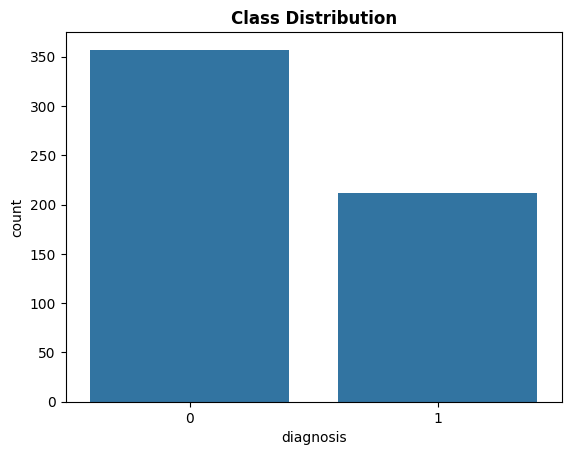

In [15]:
sns.countplot(x=df["diagnosis"])
plt.title("Class Distribution", fontweight="bold")
plt.show()

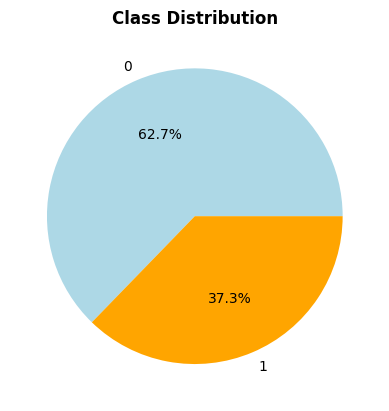

In [16]:
df["diagnosis"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "orange"])
plt.title("Class Distribution", fontweight="bold")
plt.ylabel("")
plt.show()

**Feature Selection**

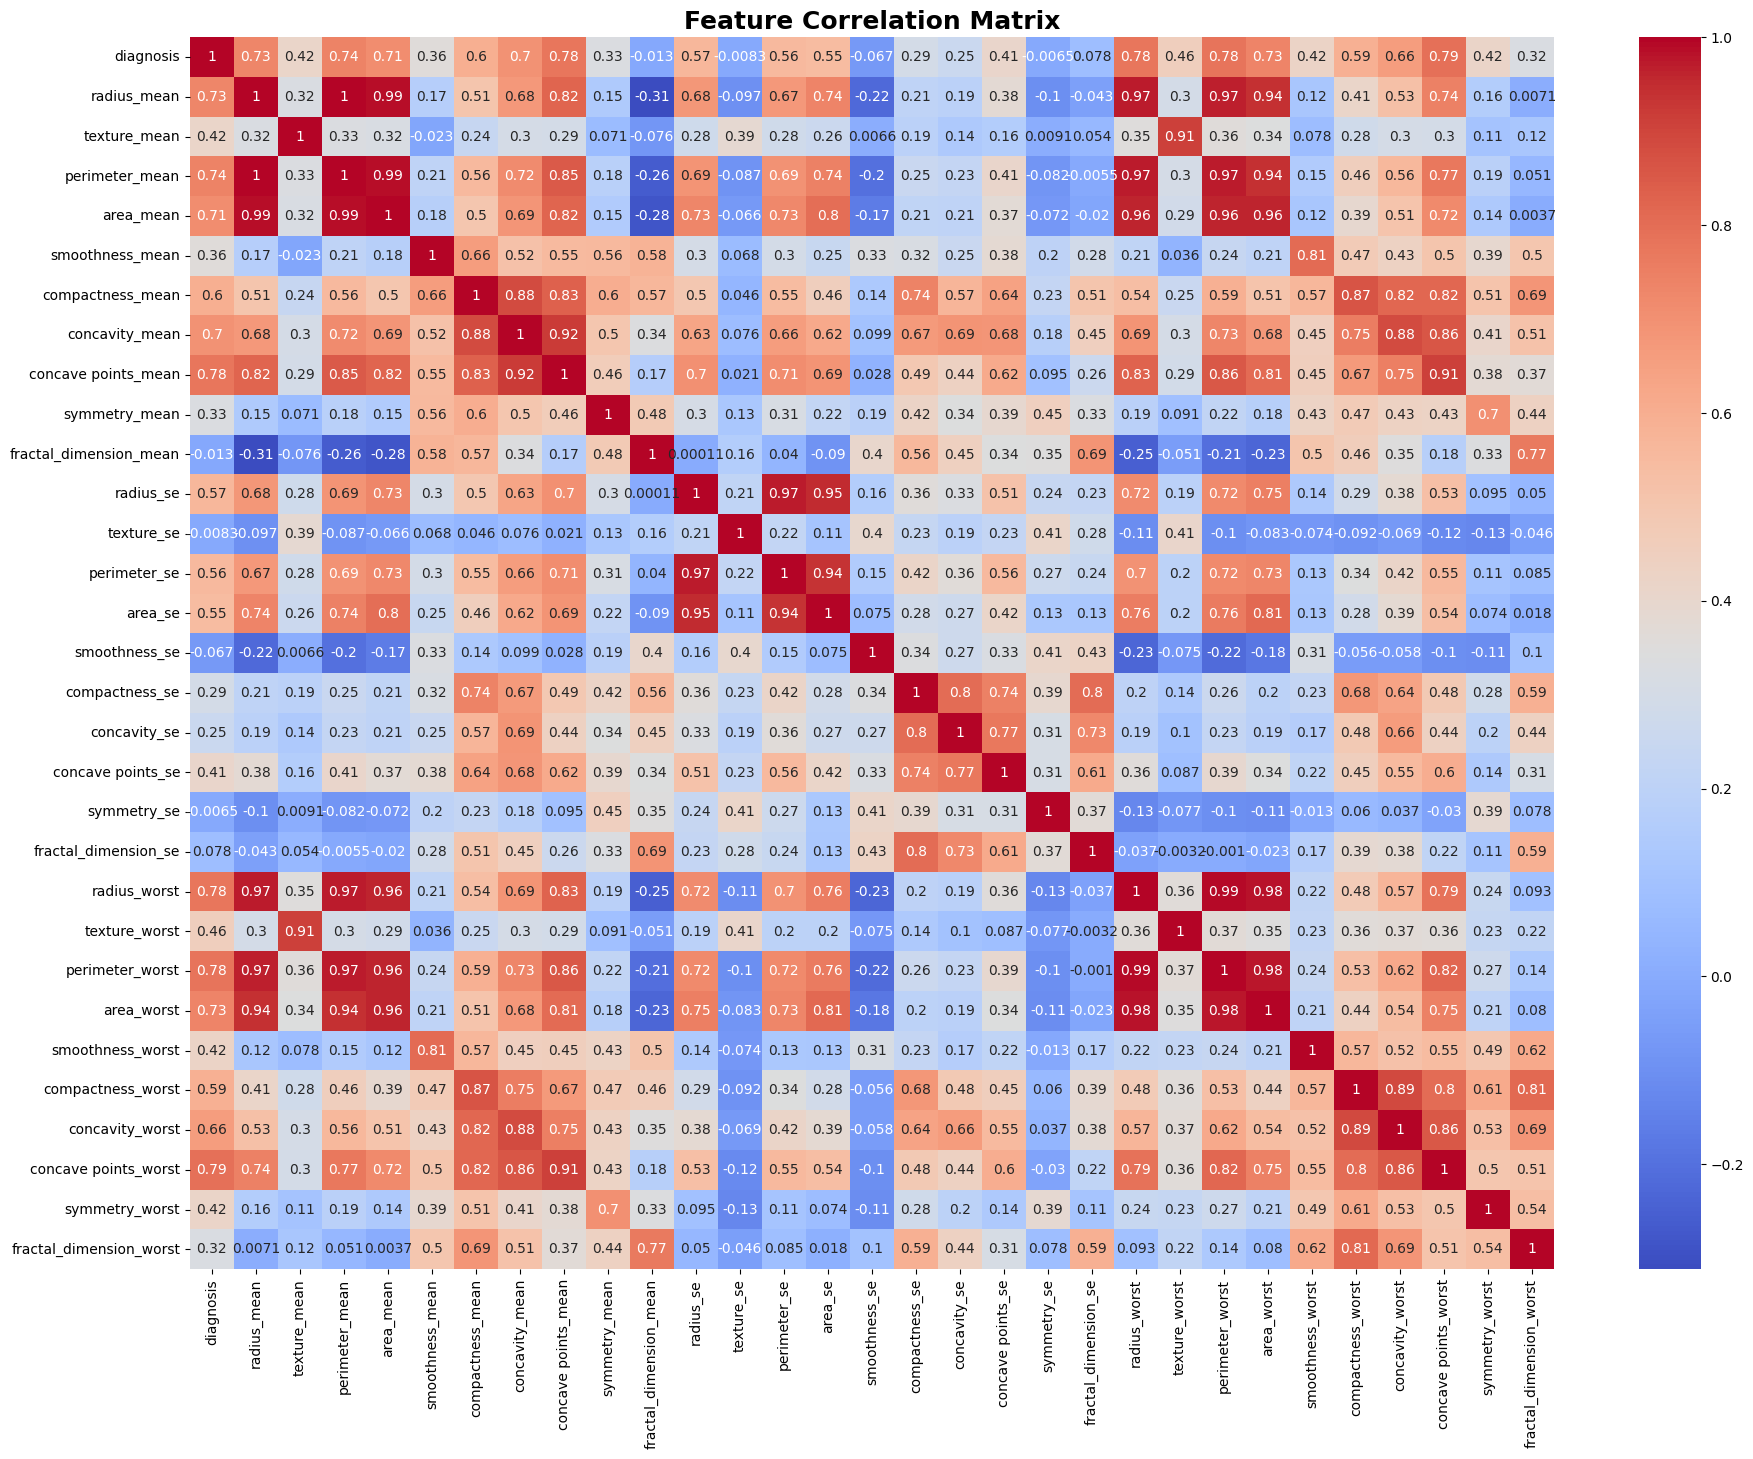

In [17]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(22,16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix", fontsize=18, fontweight='bold')
plt.show()

In [18]:
# Define features (X) - selected best features
selected_features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
X = df[selected_features]

# Define target (y) - "diagnosis" column
y = df["diagnosis"]

In [19]:
X.head()

,radius_mean,concave points_worst,perimeter_worst,concavity_mean,compactness_worst
0,17.99,0.2654,184.60,0.3001,0.6656
1,20.57,0.1860,158.80,0.0869,0.1866
2,19.69,0.2430,152.50,0.1974,0.4245
3,11.42,0.2575,98.87,0.2414,0.8663
4,20.29,0.1625,152.20,0.1980,0.2050


In [20]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


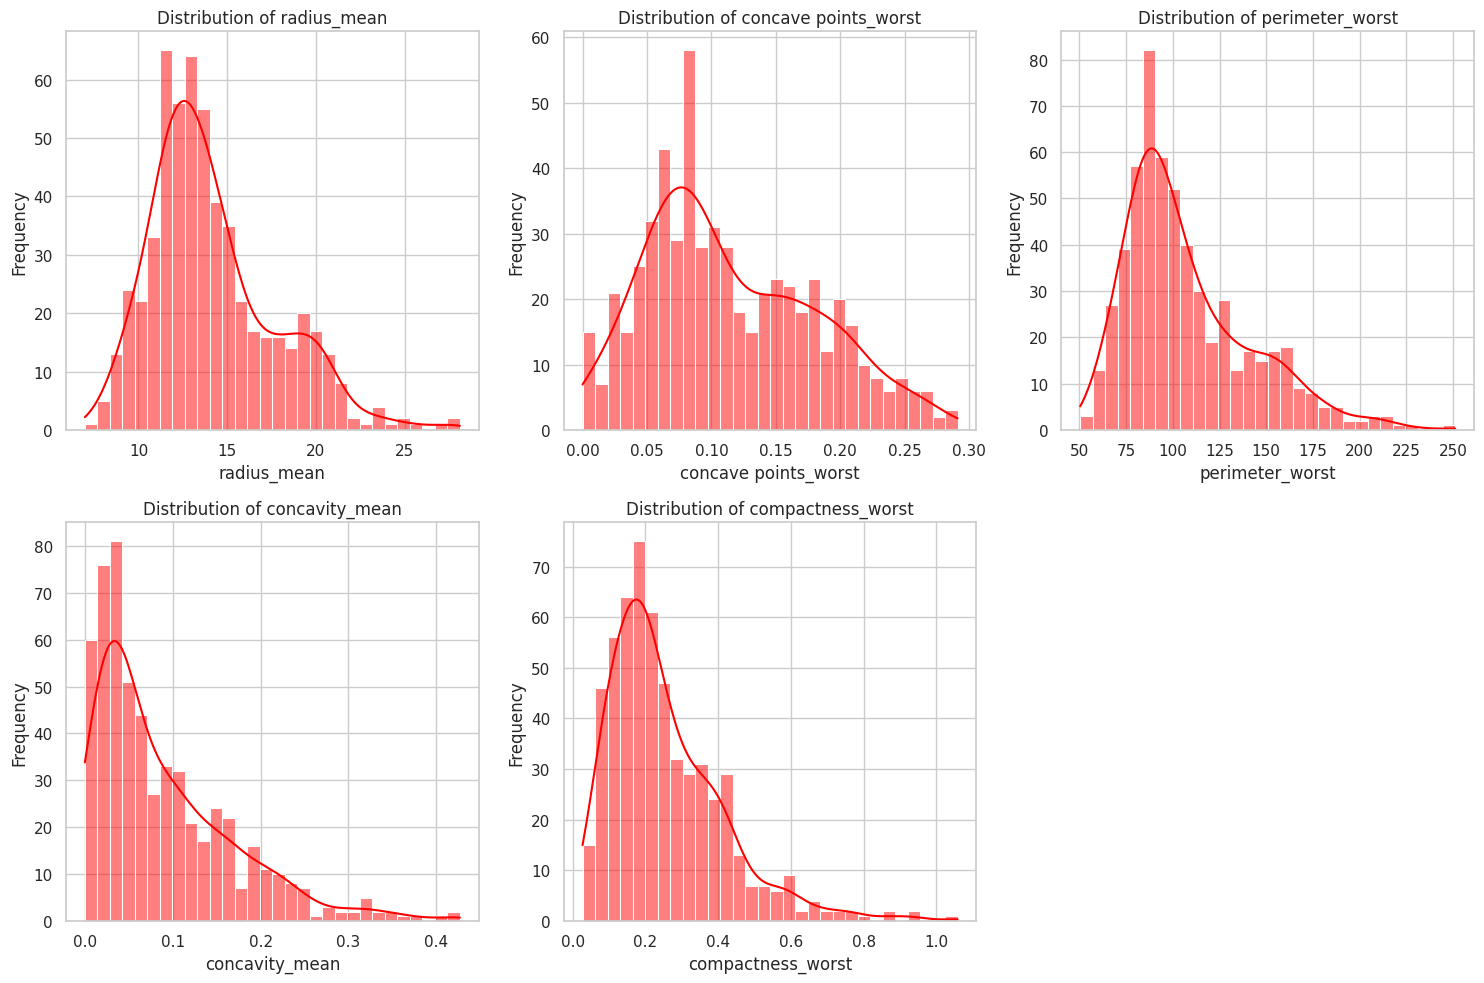

In [21]:
# Set the style
sns.set(style="whitegrid")

# Create histograms for each selected feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='red')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

<ipython-input-22-02f4e63ea86e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_df["diagnosis"] = pairplot_df["diagnosis"].map({0: "Benign", 1: "Malignant"})


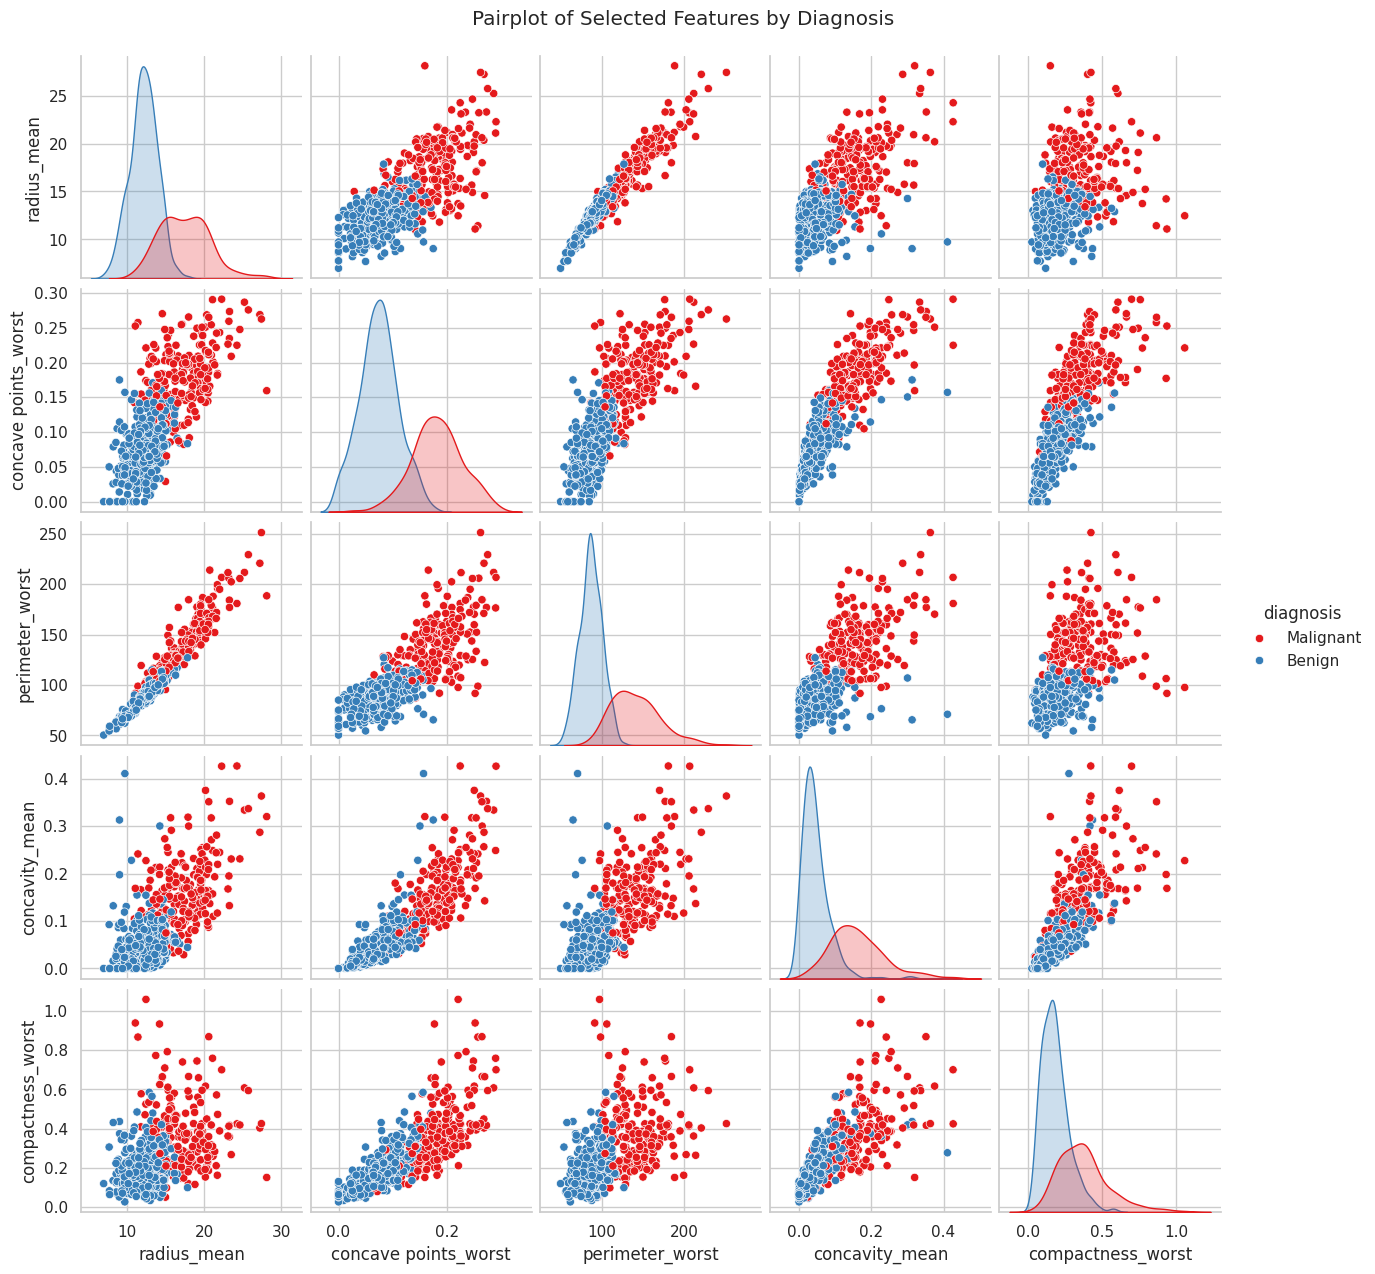

In [22]:
# Create a new DataFrame with only selected features and the target
pairplot_df = df[["radius_mean", "concave points_worst", "perimeter_worst",
                  "concavity_mean", "compactness_worst", "diagnosis"]]

# Convert diagnosis to string if it’s encoded as 0/1
pairplot_df["diagnosis"] = pairplot_df["diagnosis"].map({0: "Benign", 1: "Malignant"})

# Create pairplot
sns.pairplot(pairplot_df, hue="diagnosis", palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features by Diagnosis", y=1.02)
plt.show()

**PCA Visualization in 2D**

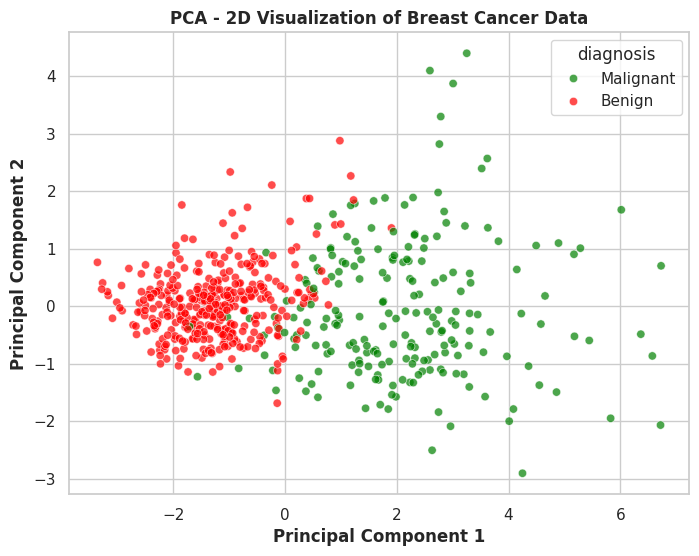

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_features])

# Step 2: Run PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Create a DataFrame with PCA components + labels
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["diagnosis"] = df["diagnosis"].map({0: "Benign", 1: "Malignant"})

# Step 4: Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="diagnosis", palette=["green", "red"], alpha=0.7)
plt.title("PCA - 2D Visualization of Breast Cancer Data", fontweight='bold')
plt.xlabel("Principal Component 1", fontweight='bold')
plt.ylabel("Principal Component 2", fontweight='bold')
plt.grid(True)
plt.show()

<Axes: ylabel='Frequency'>

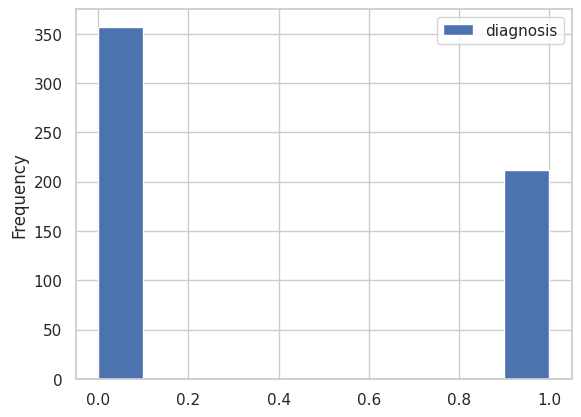

In [24]:
df.plot.hist(y="diagnosis")

**Logistic Regression**

In [25]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (455, 5)
Testing set size: (114, 5)


In [26]:
# Feature Scaling (Important for Logistic Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 **1. Model Training**

In [27]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

In [28]:
logreg_model.fit(X_train,y_train)

LogisticRegression()

**2. Model Evaluation**

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = logreg_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


**Check for Overfitting**

In [31]:
train_accuracy = logreg_model.score(X_train, y_train)
test_accuracy = logreg_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9319
Testing Accuracy: 0.9649


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5)
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")

Cross-validation Accuracy: 0.9297


In [33]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[69  2]
 [ 2 41]]


**Build a Predictive System**

In [34]:
#create a function

def predict_diagnosis(input_data):


    # Convert input data to NumPy array and reshape for a single prediction
    input_array = np.array(input_data).reshape(1, -1)

    # Scale the input data (same scaling used for training data)
    input_scaled = scaler.transform(input_array)

    # Make the prediction
    prediction = logreg_model.predict(input_scaled)

    # Output result
    if prediction[0] == 1:
        return "Malignant Breast Cancer"
    else:
        return "Benign Breast Cancer"

Sample Prediction #1

In [35]:
# Example input
input_data = [11.20,	0.00000,75.19,	0.00000,	0.05494]

# Make prediction
result = predict_diagnosis(input_data)
print("Prediction:", result)

Prediction: Benign Breast Cancer


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sample Prediction #2

In [36]:
input_data = [15.22,	0.23560,	128.70,	0.25500,	0.79170]

# Make prediction
result = predict_diagnosis(input_data)
print("Prediction:", result)

Prediction: Malignant Breast Cancer


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **2. XGBoost**

In [37]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
selected_features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
X = df[selected_features]
y = df["diagnosis"]  # Already 0 (Benign), 1 (Malignant)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
malignant = sum(y_train == 1)
benign = sum(y_train == 0)
scale = benign / malignant

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)

xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:40:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [41]:
y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9385964912280702
Confusion Matrix:
 [[70  2]
 [ 5 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Metrics:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))


XGBoost Metrics:
Precision: 0.9487179487179487
Recall: 0.8809523809523809
F1 Score: 0.9135802469135802
ROC AUC: 0.9923941798941799


# **Feature Importance Plot - XGBoost**

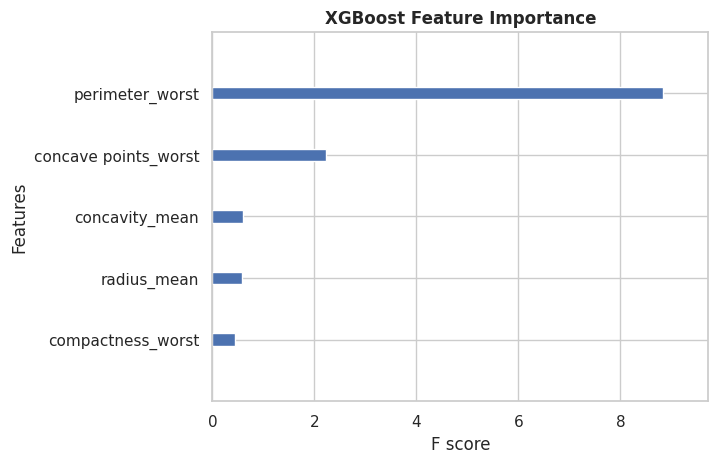

In [43]:
xgb.plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance", fontweight='bold')
plt.show()

# **Test the Predictive System**

In [44]:
def predict_cancer(input_data):
    features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
    input_df = pd.DataFrame([input_data], columns=features)

    # Predict probability
    prob = xgb_model.predict_proba(input_df)[0][1]  # Probability of malignant

    label = "Malignant" if prob > 0.5 else "Benign"
    return label, round(prob * 100, 2)

In [45]:
new_patient = [13.54, 0.1288, 99.7, 0.06664, 0.1773]  # Example input
label, confidence = predict_cancer(new_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Benign (0.28999999165534973% confidence)


In [46]:
new_patient = [15.22,	0.23560,	128.70,	0.25500,	0.79170]  # Example input
label, confidence = predict_cancer(new_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Malignant (99.94999694824219% confidence)


## **3. Random Forest**

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Confusion Matrix:
 [[72  0]
 [ 5 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [51]:
svm_proba = rf_model.predict_proba(X_test)[:, 1]

print("\nSVM Metrics:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, svm_proba))


SVM Metrics:
Precision: 1.0
Recall: 0.8809523809523809
F1 Score: 0.9367088607594937
ROC AUC: 0.990244708994709


**Test the Predictive System**

In [52]:
def predict_cancer_rf(input_data):
    features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
    input_df = pd.DataFrame([input_data], columns=features)

    prediction = rf_model.predict(input_df)[0]
    probability = rf_model.predict_proba(input_df)[0][1]

    label = "Malignant" if prediction == 1 else "Benign"
    return label, round(probability * 100, 2)

In [53]:
new_patient = [15.22,	0.23560,	128.70,	0.25500,	0.79170]
label, confidence = predict_cancer_rf(new_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Malignant (100.0% confidence)


In [54]:
new_patient = [13.54, 0.1288, 99.7, 0.06664, 0.1773]
label, confidence = predict_cancer_rf(new_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Benign (1.0% confidence)


**Feature Importance Plot**

<ipython-input-55-76324a6d93d2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


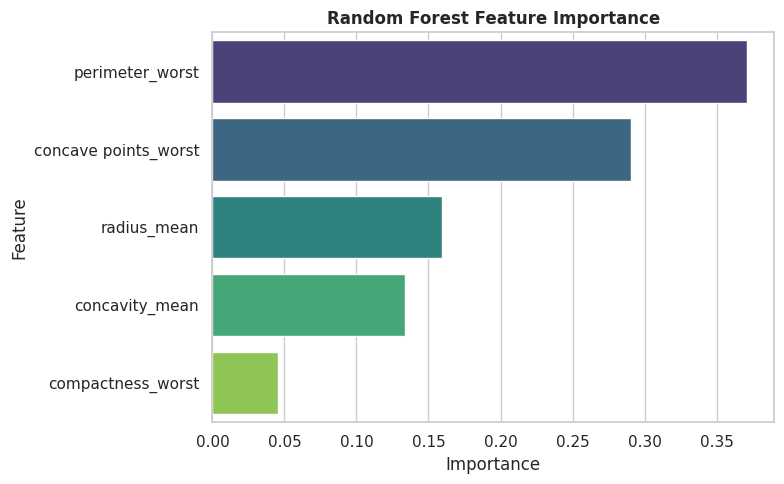

In [55]:
importances = rf_model.feature_importances_
feature_names = selected_features

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Random Forest Feature Importance", fontweight='bold')
plt.tight_layout()
plt.show()

## **4. Support Vector Machine**

In [56]:
selected_features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
X = df[selected_features]
y = df["diagnosis"]  # 0 = Benign, 1 = Malignant

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [60]:
y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Confusion Matrix:
 [[72  0]
 [ 5 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



# **Test the Predictive System**

In [61]:
def predict_cancer_svm(input_data):
    features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
    input_df = pd.DataFrame([input_data], columns=features)

    # Scale input like training data
    input_scaled = scaler.transform(input_df)

    prediction = svm_model.predict(input_scaled)[0]
    probability = svm_model.predict_proba(input_scaled)[0][1]

    label = "Malignant" if prediction == 1 else "Benign"
    return label, round(probability * 100, 2)

In [62]:
test_patient = [13.54, 0.1288, 99.7, 0.06664, 0.1773]
label, confidence = predict_cancer_svm(test_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Benign (7.28% confidence)


In [63]:
test_patient = [15.22,	0.23560,	128.70,	0.25500,	0.79170]
label, confidence = predict_cancer_svm(test_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Malignant (96.88% confidence)


# **Bar-Plot of Model Accuracies**

In [64]:
from sklearn.metrics import accuracy_score
# Example accuracy values from your models
logreg_acc = accuracy_score(y_test, logreg_model.predict(X_test_scaled))
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
svm_acc = accuracy_score(y_test, svm_model.predict(X_test_scaled))

<ipython-input-65-71f6870d0d9c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="pastel")


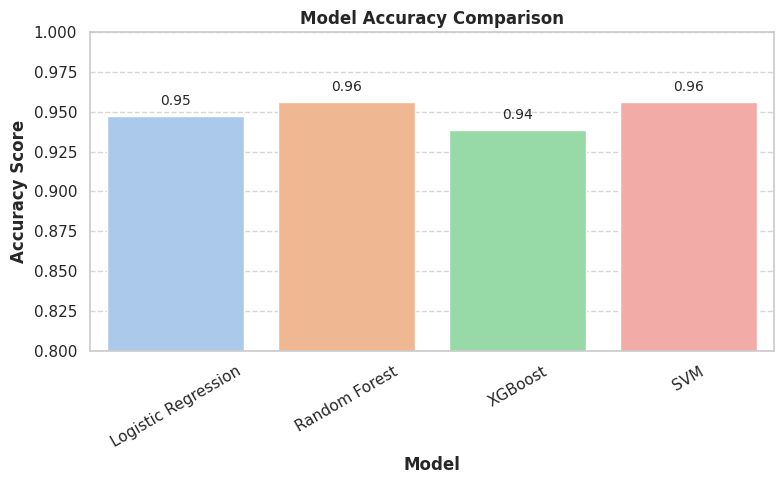

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample accuracies (replace with your real values)
model_names = ["Logistic Regression", "Random Forest", "XGBoost", "SVM"]
accuracies = [logreg_acc, rf_acc, xgb_acc, svm_acc]

# Create DataFrame
acc_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="pastel")

# Annotate the bars with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)

plt.ylim(0.8, 1.0)
plt.title("Model Accuracy Comparison", fontweight="bold")
plt.ylabel("Accuracy Score", fontweight="bold")
plt.xlabel("Model", fontweight="bold")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

# **Bar Plot for F1 Score and AUC**

In [66]:
from sklearn.metrics import f1_score, roc_auc_score

# Calculate F1-scores
logreg_f1 = f1_score(y_test, logreg_model.predict(X_test_scaled))
rf_f1     = f1_score(y_test, rf_model.predict(X_test))
xgb_f1    = f1_score(y_test, xgb_model.predict(X_test))
svm_f1    = f1_score(y_test, svm_model.predict(X_test_scaled))

# Calculate AUC scores (needs predicted probabilities)
logreg_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1])
rf_auc     = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
xgb_auc    = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
svm_auc    = roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])

<ipython-input-67-a92c16f7b3c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="husl")


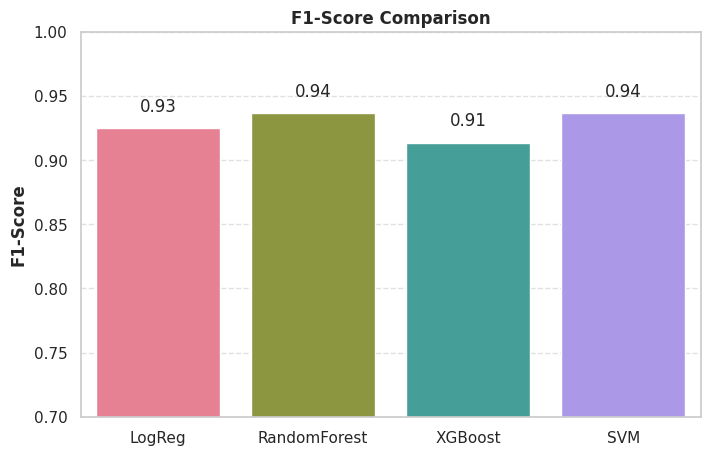

In [67]:
f1_scores = [logreg_f1, rf_f1, xgb_f1, svm_f1]
models = ["LogReg", "RandomForest", "XGBoost", "SVM"]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=f1_scores, palette="husl")

# Annotate
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f"{f1:.2f}", ha='center', va='bottom')

plt.title("F1-Score Comparison", fontweight="bold")
plt.ylabel("F1-Score", fontweight="bold")
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [68]:
import time

# Dictionary to store training times
training_times = {}

# Logistic Regression
start = time.time()
logreg_model.fit(X_train_scaled, y_train)
training_times["LogReg"] = time.time() - start

# Random Forest
start = time.time()
rf_model.fit(X_train, y_train)
training_times["RandomForest"] = time.time() - start

# XGBoost
start = time.time()
xgb_model.fit(X_train, y_train)
training_times["XGBoost"] = time.time() - start

# SVM
start = time.time()
svm_model.fit(X_train_scaled, y_train)
training_times["SVM"] = time.time() - start

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:49:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<ipython-input-69-2f413965df3f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=times, palette="Set2")


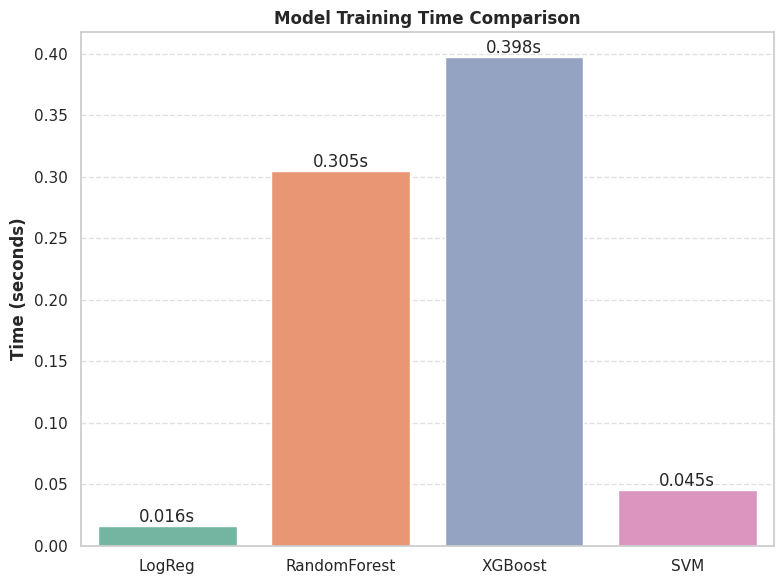

In [69]:
# Prepare data
models = list(training_times.keys())
times = list(training_times.values())

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=times, palette="Set2")

# Annotate times on top of bars
for i, t in enumerate(times):
    plt.text(i, t , f"{t:.3f}s", ha='center', va='bottom')

plt.title("Model Training Time Comparison", fontweight='bold')
plt.ylabel("Time (seconds)", fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **ROC Curve for all Models**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

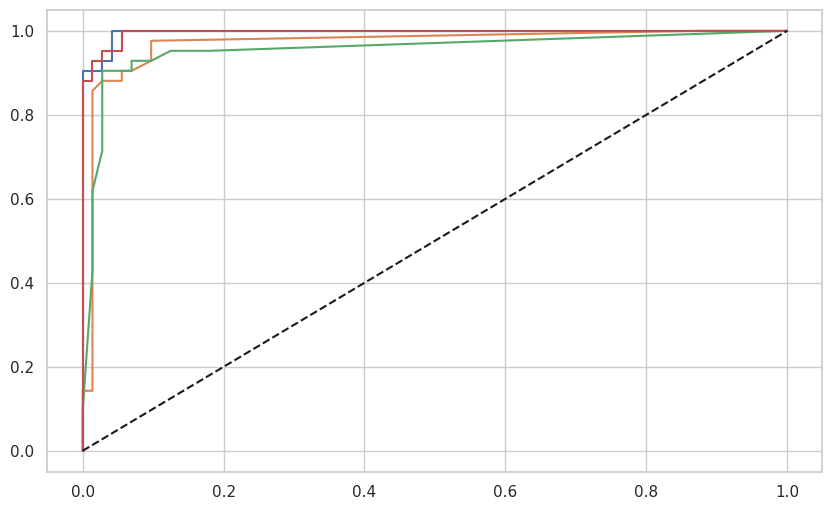

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
logreg_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)

roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.xlabel